# Introvert or Extrovert

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Dataset

In [2]:
train_df = pd.read_csv("../datasets/train.csv")
test_df = pd.read_csv("../datasets/test.csv")

In [3]:
print(train_df.shape)
print(train_df.isnull().sum())
train_df.head()

(18524, 9)
id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
print(test_df.shape)
print(test_df.isnull().sum())
test_df.head()

(6175, 8)
id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


## Merge Train and Test Data

In [5]:
X = train_df.drop(columns = 'Personality', axis = 1)

df_merged = pd.merge(X, test_df, how = 'outer')

In [6]:
df_merged.isnull().sum()

id                              0
Time_spent_Alone             1615
Stage_fear                   2491
Social_event_attendance      1577
Going_outside                1932
Drained_after_socializing    1581
Friends_circle_size          1404
Post_frequency               1672
dtype: int64

## Encoding Values

In [7]:
df_merged = df_merged.replace({'Yes': 1, 'No': 0,})

/tmp/ipykernel_8146/2597517951.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged = df_merged.replace({'Yes': 1, 'No': 0,})


## Imlputing Values

In [8]:
df_merged.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [9]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = 'mean')

num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

df_merged[num_cols] = si.fit_transform(df_merged[num_cols])

cat_cols = ['Stage_fear', 'Drained_after_socializing']

cat_imputer = SimpleImputer(strategy = 'most_frequent')

df_merged[cat_cols] = cat_imputer.fit_transform(df_merged[cat_cols])


## EDA

In [10]:
train_imputed_df = df_merged[:18524]
test_imputed_df = df_merged[18524:]

In [11]:
train_imputed_df.shape, test_imputed_df.shape

((18524, 8), (6175, 8))

In [12]:
train_imputed_df['Personality'] = train_df['Personality']

/tmp/ipykernel_8146/2321918460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_imputed_df['Personality'] = train_df['Personality']


In [13]:
train_imputed_df['Personality'] = train_imputed_df['Personality'].replace({'Extrovert': 0, 'Introvert': 1})

/tmp/ipykernel_8146/601584969.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_imputed_df['Personality'] = train_imputed_df['Personality'].replace({'Extrovert': 0, 'Introvert': 1})
/tmp/ipykernel_8146/601584969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_imputed_df['Personality'] = train_imputed_df['Personality'].replace({'Extrovert': 0, 'Introvert': 1})


<Axes: >

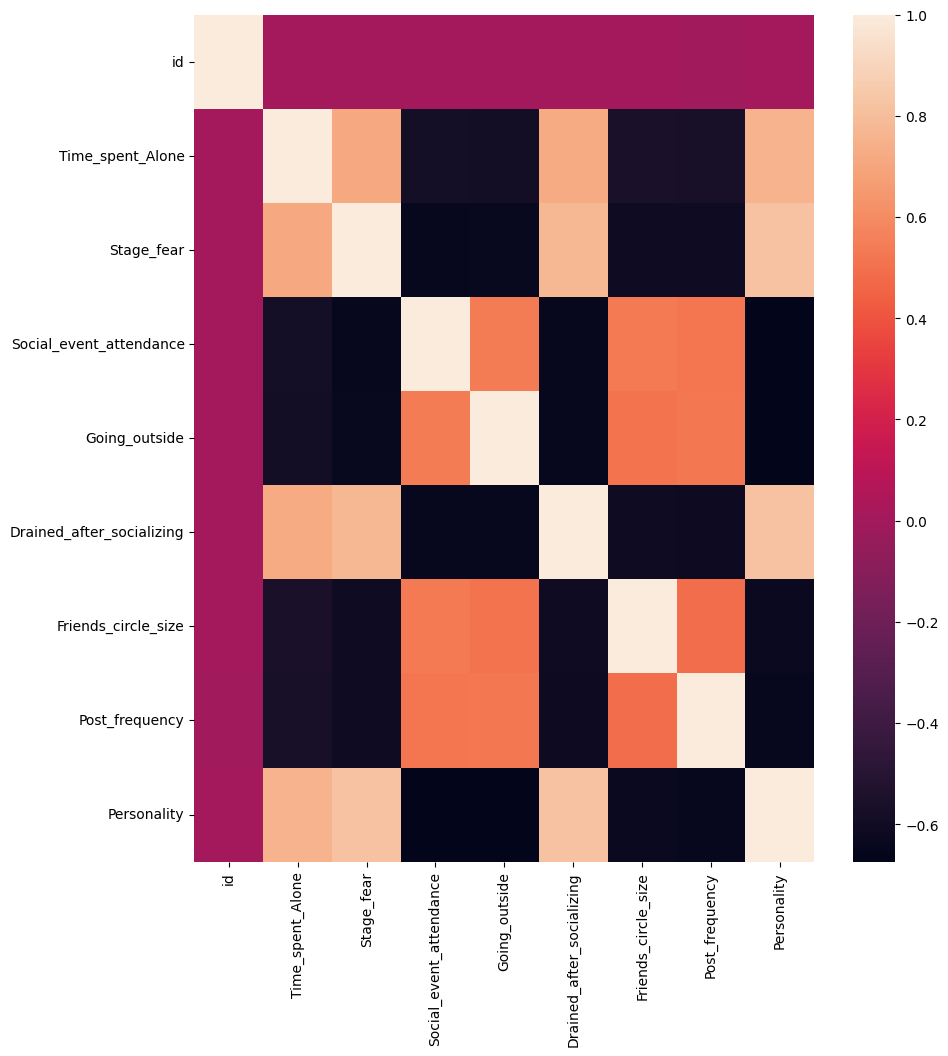

In [14]:
plt.figure(figsize = (10,11))
sns.heatmap(train_imputed_df.corr())

## Modelling

In [17]:
from sklearn.model_selection import train_test_split

X = train_imputed_df.drop(columns = 'Personality')
y = train_imputed_df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()

LR.fit(X_train, y_train)

pred = LR.predict(X_test)

print("accuracy = ",accuracy_score(pred, y_test))

accuracy =  0.9689608636977058


/home/yusuf/workspace/projects/intro-extro/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
predictions = LR.predict(test_imputed_df)

submission = pd.DataFrame({
    'id': test_imputed_df['id'],
    'Personality': predictions
})

submission['Personality'] = submission['Personality'].replace({0: 'Extrovert', 1: 'Introvert'})

submission.to_csv('../submissions/LR.csv', index = False)